<a href="https://colab.research.google.com/github/shzenith0916/Twitter_SentimentAnalysis/blob/main/V1_SentimentAnalysis_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.3 MB/s 


In [ ]:
pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip show tweepy

Name: tweepy
Version: 3.10.0
Summary: Twitter library for Python
Home-page: https://www.tweepy.org/
Author: Joshua Roesslein
Author-email: tweepy@googlegroups.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: requests, requests-oauthlib, six
Required-by: 


In [ ]:
#Import libararies 라이브러리 임포트
import pandas as pd
import numpy as np
import re
import time
import matplotlib.pyplot as plt
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Chnage directory to the folder where the login infomraiton file is 로그인 파일이 있는곳으로 디렉토리 변경
import os 
os.chdir('/content/drive/MyDrive/Colab Notebooks')
os.getcwd()
twitter_keys = open('twitter_keys.txt','r').read().splitlines() #readlines() can read line by line
keys = [line.split(',') for line in twitter_keys]

In [ ]:
# Or load the data directly 혹은 로그인 파일을 직접 올리기
from google.colab import files
uploaded = files.upload()

Saving twitter_keys.txt to twitter_keys.txt


In [ ]:
twitter_keys = open('twitter_keys.txt','r').read().splitlines() #readlines() can read line by line
keys = [line.split(',') for line in twitter_keys]

In [ ]:
# Twitter API Credentials

consumer_key = keys[0][1] #API KEY
consumer_secret = keys[1][1] #API KEY SECRET
access_token = keys[3][1] # ACESS TOKEN
access_token_secret = keys[4][1] # ACESS TOKEN SECRET

In [ ]:
# Get authentification

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

# Search by user 유저에 따른 트윗

In [ ]:
# Extract 1 tweet from the FOMC account for testing
test_post = api.user_timeline('@federalreserve', count=1, tweet_mode='extended')

In [ ]:
# Print the recent 5 tweets from the user_id for testing, count개수를 5로 하여 최근 5개 트윗 불러오기 
test_tweet = api.user_timeline('@federalreserve', count=5, tweet_mode='extended')
for tweet in test_tweet:
  print(tweet.full_text)

Interactive guide to our weekly #BalanceSheet report: https://t.co/75xiVYkEIu #FedData
Our weekly #BalanceSheet update: https://t.co/LjSvhf5K21 #FedData
@federalreserve announces pricing, effective January 3, 2023, for payment services the Federal Reserve Banks provide to depository institutions, such as the clearing of checks, ACH transactions, and wholesale payment and settlement services: https://t.co/et8HkPC8zU
#FedFAQ:  I received a suspicious-looking e-mail that claims to be from the Federal Reserve. Is it a scam?
Learn more:
https://t.co/0b1Bgmhy3y https://t.co/MGOFP7yH3J
Today’s #EnforcementActions: https://t.co/Y5mR9CsggJ


In [ ]:
test_post

 위의 트윗에서 consider 해 보아야할 변수들을 나열 해 보았습니다.<br>
 - user.screen_name: 유저
 - created_at: 트윗을 올린시간
 - favorite_count: 소스 트윗의 좋아요 횟수, provides the number of times the tweet has been favorited. 
 - full text: 트윗 내용
 - user_mentions: 유저가 언급한 다른 트위터 계정 
 - source: 트윗을 올린 소스가 모바일이냐 혹은 pc인지 확인 가능
 - retweeted: False or True 로 미리 필터 가능한 줄 알았으나, 실제로 리트윗 되었더라도 False라고 나온 경우 다수 발견
 - retweet_count: 리트윗 된 횟수


In [ ]:
for tweet in test_post[0:1]:
  print(tweet.full_text)
  print(tweet.created_at)
  print(tweet.user.screen_name)
  print(tweet.source)
  print(tweet.favorite_count)
  print(tweet.retweeted)
  print(tweet.retweet_count)

Now available: Weekly data on the Assets and Liabilities of Commercial Banks in the United States: https://t.co/Q478Ld1nn1 #FedData
2022-10-07 20:18:39
federalreserve
Twitter Web App
46
False
21


In [ ]:
# 트윗데이터 중에서, 필요하다고 생각되는 변수 선택하여 트윗 디테일 불러오기
tw_list = [[tweet.user.screen_name, tweet.created_at, tweet.source, tweet.favorite_count, tweet.retweet_count, tweet.full_text] for tweet in test_tweet]
tw_list

[['federalreserve',
  datetime.datetime(2022, 10, 7, 20, 18, 39),
  'Twitter Web App',
  46,
  21,
  'Now available: Weekly data on the Assets and Liabilities of Commercial Banks in the United States: https://t.co/Q478Ld1nn1 #FedData'],
 ['federalreserve',
  datetime.datetime(2022, 10, 7, 19, 2, 1),
  'Twitter Web App',
  213,
  88,
  'August consumer credit up 8.3%; revolving credit up 18.1%; nonrevolving credit up 5.1% (SAAR): https://t.co/Zujt3BBoaT'],
 ['federalreserve',
  datetime.datetime(2022, 10, 7, 16, 52, 30),
  'Twitter Web App',
  34,
  13,
  'Register now for the 16th Annual Economics Scholars Program for Undergraduate Research Conference at the @Dallasfed on October 21, 8:45 a.m. ET. #EconTwitter #EconEdMonth\nhttps://t.co/S7ImcLEtfq'],
 ['federalreserve',
  datetime.datetime(2022, 10, 7, 13, 56, 32),
  'Twitter Web App',
  24,
  9,
  'Register for a @FedCommunities virtual event on October 20, 2:00 p.m. ET – Toward an Inclusive Recovery: Consequences of the Pandemic for 

In [ ]:
test_df = pd.DataFrame(tw_list, columns=['user', 'created_at', 'source', 'favorite_count', 'retweet_count', 'full_text'])
test_df

,user,created_at,source,favorite_count,retweet_count,full_text
0,federalreserve,2022-10-07 20:18:39,Twitter Web App,46,21,Now available: Weekly data on the Assets and L...
1,federalreserve,2022-10-07 19:02:01,Twitter Web App,213,88,August consumer credit up 8.3%; revolving cred...
2,federalreserve,2022-10-07 16:52:30,Twitter Web App,34,13,Register now for the 16th Annual Economics Sch...
3,federalreserve,2022-10-07 13:56:32,Twitter Web App,24,9,Register for a @FedCommunities virtual event o...
4,federalreserve,2022-10-07 13:50:44,Twitter Web App,49,19,See next week's #calendar of events: https://t...


In [ ]:
# count_n is how mnay tweets to extract from the twitter_user
def tweets_by_user(user_id, count_n, language='en'):
  tweets = api.user_timeline(user_id, count=count_n, lang = language, tweet_mode='extended')
  tweet_list = [[tweet.user.name, tweet.created_at, tweet.full_text, tweet.source, tweet.favorite_count, tweet.retweet_count] for tweet in tweets]
  return tweet_list

In [ ]:
# Print tweets in dataframe form
def tweet_df_userbased(user, count):
  posts = tweets_by_user(user_id=user, count_n=count)
  df = pd.DataFrame([tweet for tweet in posts], columns=('user', 'created_at','full_text', 'source', 'favorite_count', 'retweet_count') )
  return df

In [ ]:
# Print the last 10 tweets from the user_id for testing
recent_five = tweet_df_userbased('@federalreserve', 10)
recent_five

,user,created_at,full_text,source,favorite_count,retweet_count
0,Federal Reserve,2022-10-07 20:18:39,Now available: Weekly data on the Assets and L...,Twitter Web App,46,21
1,Federal Reserve,2022-10-07 19:02:01,August consumer credit up 8.3%; revolving cred...,Twitter Web App,213,88
2,Federal Reserve,2022-10-07 16:52:30,Register now for the 16th Annual Economics Sch...,Twitter Web App,34,13
3,Federal Reserve,2022-10-07 13:56:32,Register for a @FedCommunities virtual event o...,Twitter Web App,24,9
4,Federal Reserve,2022-10-07 13:50:44,See next week's #calendar of events: https://t...,Twitter Web App,49,19
5,Federal Reserve,2022-10-06 21:01:48,Learn more about Governor Waller: https://t.co...,Twitter Web App,21,6
6,Federal Reserve,2022-10-06 21:01:40,Speech by Governor Waller on the economic outl...,Twitter Web App,20,14
7,Federal Reserve,2022-10-06 20:33:09,Interactive guide to our weekly #BalanceSheet ...,Twitter Web App,13,7
8,Federal Reserve,2022-10-06 20:32:57,Our weekly #BalanceSheet update: https://t.co/...,Twitter Web App,37,21
9,Federal Reserve,2022-10-06 18:00:52,@federalreserve announces it will replace curr...,Twitter Web App,81,36


In [ ]:
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['text'][df['Compound'] > 0.5])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive

## 여러 유저들의 트윗 데이터

In [ ]:
# influencers of cryptocurrency world  => 2022 updated soucrce: https://influencermarketinghub.com/top-crypto-influencers/
influencers = ['@VitalikButerin', '@rogerkver', '@aantop', '@TimDraper', '@SatoshiLite', 
               '@APompliano', '@ErikVoorhees', '@ToneVays', '@officialmcafee', '@IvanOnTech' ]
               
search_users = ['@bitcoin', '@ethereum', '@coinbase', '@binance', '@krakenfx']

In [ ]:
Influencer_data = []

# Iterate through cryptocurrency influencer twitter accounts 
for person in influencers:

  # Extract 100 tweets
  bit_tweets = api.user_timeline(person, count=100, lang = 'en', tweet_mode='extended')
  
  # Loop through tweets
  for tweet in bit_tweets:
    text = tweet.full_text
    source = tweet.source
    date = tweet.created_at
    favorite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    Influencer_data.append({"user": person,
                           "date": date,
                            "text": text,
                           "source": source,
                            "favorite_count": favorite_count,
                            "retweet_count": retweet_count
                            })

In [ ]:
Influencer_df = pd.DataFrame.from_dict(Influencer_data)
Influencer_df.head()

,user,date,text,source,favorite_count,retweet_count
0,@VitalikButerin,2022-10-08 02:48:47,@seven7hwave Technically the chain was unavail...,Twitter Web App,924,50
1,@VitalikButerin,2022-10-07 19:50:52,&gt; made many crucial contributions\n\nInclud...,Twitter Web App,302,29
2,@VitalikButerin,2022-10-07 19:49:36,Eli and the Starkware team have made many cruc...,Twitter Web App,1059,137
3,@VitalikButerin,2022-10-07 17:05:00,@PedroTerruggi @tszzl I'm saying something eve...,Twitter Web App,9,0
4,@VitalikButerin,2022-10-07 12:55:11,@real_n3o @tszzl I agree that if that's the wo...,Twitter Web App,16,0


In [ ]:
Influencer_df.tail()

,user,date,text,source,favorite_count,retweet_count
901,@IvanOnTech,2022-08-21 14:40:49,@MarBlockchain @MartinssonFM @MoralisWeb3 🤩👏👏,Twitter for iPhone,2,0
902,@IvanOnTech,2022-08-21 14:40:44,RT @MarBlockchain: So proud!! 🫶🏻 Thanks so muc...,Twitter for iPhone,0,5
903,@IvanOnTech,2022-08-21 09:09:44,RT @cz_binance: Dips explained.,Twitter Web App,0,3983
904,@IvanOnTech,2022-08-21 08:55:40,RT @MoralisWeb3: 📣WE'RE HIRING📣\n\nAre you a S...,Twitter for iPhone,0,11
905,@IvanOnTech,2022-08-20 18:47:47,RT @MorningBrew: sounds familiar https://t.co/...,Twitter for iPhone,0,27


In [ ]:
#filepath
Influencer_df.to_csv("influencer_tweet_data_100.csv", encoding='utf-8')

# preprocessing/cleaning 데이터 전처리/클리닝
- re.sub 함수사용<br>
re.sub(pattern, replacement, string) 함수를 이용하여 주어진 string에서 pattern과 일치하는 내용을 replacement로 변경. <br>

In [ ]:
import html

In [ ]:
def remove_unnecessary(text):
  # Escaping out HTML characters including  ', &, >, <
  text = html.unescape(text)
  # remove twitter Return -> RT @xx 패턴을 가지고 있는 RT를 다 지우기 
  text = re.sub("RT @[\w]*:", "", text) 
  # remove twitter handles -> @xx 패턴을 가지고 있는 다른 유저 멘션을 지우기
  text = re.sub("@[\w]*","",text)
  # remove URLs
  text = re.sub("https?://[A-Za-z0-9./]*", "", text)
  # remove hyperlinks
  text = re.sub(r'https?:\/\/.\S+', "", text)
  # remove white spaces
  text = " ".join(text.split())
  return text

## Didn't remove punctuations, emojis, special characters including hashtag because those are important to read/interpret the sentiment/opinion.
## 해시태그를 포함한 특수문자, 문장부호 (!,?), 이모티콘은 감정/의견을 읽거나 해석하는 데 중요하기 때문에 제거하지 않았습니다

In [ ]:
recent_five['full_text'][1]

'@TrustlessState @daddysether I don\'t think the industry "collectively learned a lesson"\n\nWhether the DAO-hack/fork was good or bad is highly contested, and if we\'re being honest most users of crypto likely have no idea what that even was.\n\nBut let\'s at least have a little patience for differing opinions.'

In [ ]:
remove_unnecessary(recent_five['full_text'][1])

'I don\'t think the industry "collectively learned a lesson" Whether the DAO-hack/fork was good or bad is highly contested, and if we\'re being honest most users of crypto likely have no idea what that even was. But let\'s at least have a little patience for differing opinions.'

In [ ]:
Influencer_df['text'] = Influencer_df['text'].apply(remove_unnecessary)
Influencer_df.head()

,user,date,text,source,favorite_count,retweet_count
0,@VitalikButerin,2022-10-08 02:48:47,Technically the chain was unavailable for very...,Twitter Web App,924,50
1,@VitalikButerin,2022-10-07 19:50:52,&gt; made many crucial contributions Including...,Twitter Web App,302,29
2,@VitalikButerin,2022-10-07 19:49:36,Eli and the Starkware team have made many cruc...,Twitter Web App,1059,137
3,@VitalikButerin,2022-10-07 17:05:00,I'm saying something even stronger: the comfor...,Twitter Web App,9,0
4,@VitalikButerin,2022-10-07 12:55:11,"I agree that if that's the world we enter, my ...",Twitter Web App,16,0


In [ ]:
Influencer_df['text'] = Influencer_df['text'].apply(lambda text: remove_unnecessary(text))
Influencer_df.tail()

,user,date,text,source,favorite_count,retweet_count
901,@IvanOnTech,2022-08-21 14:40:49,🤩👏👏,Twitter for iPhone,2,0
902,@IvanOnTech,2022-08-21 14:40:44,So proud!! 🫶🏻 Thanks so much #stayteachable,Twitter for iPhone,0,5
903,@IvanOnTech,2022-08-21 09:09:44,Dips explained.,Twitter Web App,0,3983
904,@IvanOnTech,2022-08-21 08:55:40,📣WE'RE HIRING📣 Are you a Senior Backend Engine...,Twitter for iPhone,0,11
905,@IvanOnTech,2022-08-20 18:47:47,sounds familiar,Twitter for iPhone,0,27


# Sentiment Analysis using Vader model 베이더 모델을 이용한 감정분석
# Why am i using VADER model? / VADER 모델을 사용하는 이유
-  Polarity & Intensity(strength) of emotion Analysis 양극성(긍정/부정) 및 감정의 강도 분석<br>
-  Dealing with emojis and slang(ex.lol) 이모티콘과 속어 처리<br>
-  Better interpretation on capital points and punctuation(ex.'GOOD!!' is better than 'good') 대문자 및 구두점에 대한 더 나은 해석(예: 'GOOD!'가 'good'보다 낫다)<br>
-  Understand basic context of these words, such as “did not love” as a negative statement 사랑하지 않았다가 부정적인 말이라고 워딩의 문맥을 이해한다.

## Cons(-) of Vader 모델의 단점
- Accuracy is not great sometimes
- Cannot interpret scarcastic words/text


In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
Influencer_df['scores'] = Influencer_df['text'].apply(lambda text: analyzer.polarity_scores(text) )
Influencer_df.head()

,user,date,text,source,favorite_count,retweet_count,scores
0,@VitalikButerin,2022-10-06 12:27:21,ATTN: #Tech4Democracy's deadline is extended. ...,Twitter Web App,0,28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,@VitalikButerin,2022-10-06 12:26:10,&gt; are too attractive to hinterlands to leav...,Twitter Web App,11,1,"{'neg': 0.22, 'neu': 0.586, 'pos': 0.194, 'com..."
2,@VitalikButerin,2022-10-06 12:21:32,What is the smallest delta to Praxis that woul...,Twitter Web App,12,0,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp..."
3,@VitalikButerin,2022-10-06 12:05:24,The interesting thing is we can actually measu...,Twitter Web App,5,0,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp..."
4,@VitalikButerin,2022-10-06 11:45:30,I recommend you look deeply at the various stu...,Twitter Web App,6,2,"{'neg': 0.041, 'neu': 0.8, 'pos': 0.159, 'comp..."


In [ ]:
Influencer_df['compound']  = Influencer_df['scores'].apply(lambda score_dict: score_dict['compound'])
Influencer_df.head()

,user,date,text,source,favorite_count,retweet_count,scores,label,compound
0,@VitalikButerin,2022-10-06 12:27:21,ATTN: #Tech4Democracy's deadline is extended. ...,Twitter Web App,0,28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.0000
1,@VitalikButerin,2022-10-06 12:26:10,&gt; are too attractive to hinterlands to leav...,Twitter Web App,11,1,"{'neg': 0.22, 'neu': 0.586, 'pos': 0.194, 'com...",positive,0.4857
2,@VitalikButerin,2022-10-06 12:21:32,What is the smallest delta to Praxis that woul...,Twitter Web App,12,0,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...",positive,0.3182
3,@VitalikButerin,2022-10-06 12:05:24,The interesting thing is we can actually measu...,Twitter Web App,5,0,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...",positive,0.7787
4,@VitalikButerin,2022-10-06 11:45:30,I recommend you look deeply at the various stu...,Twitter Web App,6,2,"{'neg': 0.041, 'neu': 0.8, 'pos': 0.159, 'comp...",positive,0.6499


In [ ]:
Influencer_df['scores'][4]['compound']

0.6499

In [ ]:
Influencer_df['text'].shape[0]

906

In [ ]:
scores_dict_array=[]
for i in range(Influencer_df['text'].shape[0]):
  compound = analyzer.polarity_scores(Influencer_df['text'][i])['compound']
  pos =  analyzer.polarity_scores(Influencer_df['text'][i])['pos']
  neg =  analyzer.polarity_scores(Influencer_df['text'][i])['neg']
  neu =  analyzer.polarity_scores(Influencer_df['text'][i])['neu']
  
  scores_dict_array.append({"Compound": compound,
                 "Positive": pos,
                 "Negative": neg,
                 "Neutral": neu
                 })  

In [ ]:
sentiment_scores = pd.DataFrame.from_dict(scores_dict_array)
sentiment_scores.head()

,Compound,Positive,Negative,Neutral
0,0.0000,0.000,0.000,1.000
1,0.4857,0.194,0.220,0.586
2,0.3182,0.133,0.000,0.867
3,0.7787,0.145,0.000,0.855
4,0.6499,0.159,0.041,0.800


In [ ]:
Influencer_df = Influencer_df.join(sentiment_scores)
Influencer_df.head()

,user,date,text,source,favorite_count,retweet_count,scores,label,compound,Compound,Positive,Negative,Neutral
0,@VitalikButerin,2022-10-06 12:27:21,ATTN: #Tech4Democracy's deadline is extended. ...,Twitter Web App,0,28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.0000,0.0000,0.000,0.000,1.000
1,@VitalikButerin,2022-10-06 12:26:10,&gt; are too attractive to hinterlands to leav...,Twitter Web App,11,1,"{'neg': 0.22, 'neu': 0.586, 'pos': 0.194, 'com...",positive,0.4857,0.4857,0.194,0.220,0.586
2,@VitalikButerin,2022-10-06 12:21:32,What is the smallest delta to Praxis that woul...,Twitter Web App,12,0,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...",positive,0.3182,0.3182,0.133,0.000,0.867
3,@VitalikButerin,2022-10-06 12:05:24,The interesting thing is we can actually measu...,Twitter Web App,5,0,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...",positive,0.7787,0.7787,0.145,0.000,0.855
4,@VitalikButerin,2022-10-06 11:45:30,I recommend you look deeply at the various stu...,Twitter Web App,6,2,"{'neg': 0.041, 'neu': 0.8, 'pos': 0.159, 'comp...",positive,0.6499,0.6499,0.159,0.041,0.800


In [ ]:
cols = [7]
Influencer_df.drop(Influencer_df.columns[cols],axis=1,inplace=True)
Influencer_df.head()

,user,date,text,source,favorite_count,retweet_count,scores,Compound,Positive,Negative,Neutral
0,@VitalikButerin,2022-10-06 12:27:21,ATTN: #Tech4Democracy's deadline is extended. ...,Twitter Web App,0,28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
1,@VitalikButerin,2022-10-06 12:26:10,&gt; are too attractive to hinterlands to leav...,Twitter Web App,11,1,"{'neg': 0.22, 'neu': 0.586, 'pos': 0.194, 'com...",0.4857,0.194,0.220,0.586
2,@VitalikButerin,2022-10-06 12:21:32,What is the smallest delta to Praxis that woul...,Twitter Web App,12,0,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...",0.3182,0.133,0.000,0.867
3,@VitalikButerin,2022-10-06 12:05:24,The interesting thing is we can actually measu...,Twitter Web App,5,0,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...",0.7787,0.145,0.000,0.855
4,@VitalikButerin,2022-10-06 11:45:30,I recommend you look deeply at the various stu...,Twitter Web App,6,2,"{'neg': 0.041, 'neu': 0.8, 'pos': 0.159, 'comp...",0.6499,0.159,0.041,0.800


In [ ]:
# Compound value is computed by normalizing the scores of neg,pos,neu. 

def predict_sentiment(x):
  # x is compound value
  if x >= 0.05:
    return 'positive'
  elif x <= - 0.05:
    return 'negative'
  else:
    return 'neutral'

In [ ]:
Influencer_df['label'] = sentiment_scores['Compound'].apply(lambda x: predict_sentiment(x))
#Influencer_df['label'] = Influencer_df['compound'].apply(lambda x: predict_sentiment(x))
Influencer_df.head()

,user,date,text,source,favorite_count,retweet_count,scores,Compound,Positive,Negative,Neutral,label
0,@VitalikButerin,2022-10-06 12:27:21,ATTN: #Tech4Democracy's deadline is extended. ...,Twitter Web App,0,28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral
1,@VitalikButerin,2022-10-06 12:26:10,&gt; are too attractive to hinterlands to leav...,Twitter Web App,11,1,"{'neg': 0.22, 'neu': 0.586, 'pos': 0.194, 'com...",0.4857,0.194,0.220,0.586,positive
2,@VitalikButerin,2022-10-06 12:21:32,What is the smallest delta to Praxis that woul...,Twitter Web App,12,0,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...",0.3182,0.133,0.000,0.867,positive
3,@VitalikButerin,2022-10-06 12:05:24,The interesting thing is we can actually measu...,Twitter Web App,5,0,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...",0.7787,0.145,0.000,0.855,positive
4,@VitalikButerin,2022-10-06 11:45:30,I recommend you look deeply at the various stu...,Twitter Web App,6,2,"{'neg': 0.041, 'neu': 0.8, 'pos': 0.159, 'comp...",0.6499,0.159,0.041,0.800,positive


(array([ 11.,  10.,  22.,  25.,  24.,  24.,  26.,  28.,  14.,  22., 272.,
         22.,  30.,  45.,  67.,  57.,  57.,  51.,  63.,  36.]),
 array([-0.9738 , -0.87705, -0.7803 , -0.68355, -0.5868 , -0.49005,
        -0.3933 , -0.29655, -0.1998 , -0.10305, -0.0063 ,  0.09045,
         0.1872 ,  0.28395,  0.3807 ,  0.47745,  0.5742 ,  0.67095,
         0.7677 ,  0.86445,  0.9612 ]),
 <a list of 20 Patch objects>)

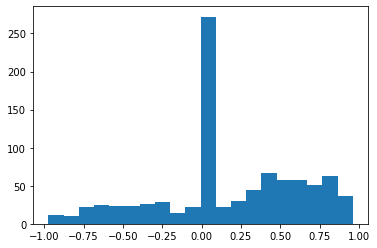

In [ ]:
plt.hist(Influencer_df['compound'], bins=20)

In [ ]:
score_table = Influencer_df.pivot_table(index='user', values='compound', aggfunc= np.mean)
score_table

,compound
user,
@APompliano,0.137413
@ErikVoorhees,0.091443
@IvanOnTech,0.222302
@SatoshiLite,0.202806
@TimDraper,0.547878
@ToneVays,0.123303
@VitalikButerin,0.117645
@aantop,0.070250
@officialmcafee,-0.004343


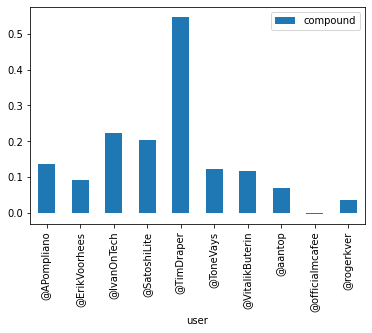

In [ ]:
score_table.plot(kind="bar")

In [ ]:
neg_score_table = Influencer_df.pivot_table(index='user', values='Negative', aggfunc= np.mean)
neg_score_table

,Negative
user,
@APompliano,0.12198
@ErikVoorhees,0.07298
@IvanOnTech,0.03882
@SatoshiLite,0.02116
@TimDraper,0.02404
@ToneVays,0.07008
@VitalikButerin,0.06739
@aantop,0.00000
@officialmcafee,0.09279


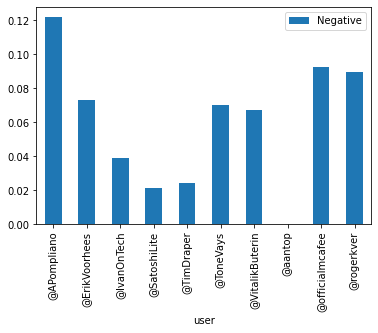

In [ ]:
neg_score_table.plot(kind="bar")
# APompliano has the most negative tweets 

In [ ]:
pos_score_table = Influencer_df.pivot_table(index='user', values='Positive', aggfunc= np.mean)
pos_score_table

,Positive
user,
@APompliano,0.130080
@ErikVoorhees,0.088310
@IvanOnTech,0.145010
@SatoshiLite,0.089920
@TimDraper,0.276870
@ToneVays,0.120490
@VitalikButerin,0.102380
@aantop,0.059833
@officialmcafee,0.116640


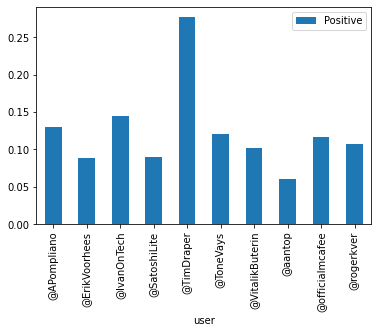

In [ ]:
pos_score_table.plot(kind="bar")
# aantop has the least positive score

Reference Source: 

- crytocurrency <br>
1) https://influencermarketinghub.com/top-crypto-influencers/ <br>
- sentiment analysis <br>
1) vader- https://python.plainenglish.io/twitter-sentiment-analysis-using-vader-tweepy-b2a62fba151e <br>

Futher studies

- mining reply tweet <br>
1) https://towardsdatascience.com/mining-replies-to-tweets-a-walkthrough-9a936602c4d6 <br>
